In [308]:
import pandas as pd
import numpy as np
from database import engine
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from ingredient_map import create_ingredient_map
from quant_preprocess import query_data
from quant_preprocess import cols_to_lower
from quant_preprocess import get_cols_list
from quant_preprocess import query_and_preprocess_data
from quant_preprocess import shape_data_long
from quant_preprocess import merge_long
from quant_preprocess import pivot_wide
from quant_preprocess import recode_ingredients
import os


INPUT_PATH = os.path.join("..//data", "ingredient_prices_clean.csv")
OUTPUT_DIR = "data"
df_drinks = query_and_preprocess_data()
liquors = ["strdrink","brandy","gin","tequila","vodka","whiskey","flavored rum","flavored vodka","cognac","bourbon","brandy","scotch","grain alcohol"]

In [309]:
def create_dummies(df):
    
    headers = df.columns[1:]
    d = {'strdrink': df['strdrink'].values.tolist()}
    for e in range(0, len(headers)):
        d[headers[e]] = (df[str(headers[e])] > 0).astype(int).values.tolist()
    return pd.DataFrame.from_dict(d)

In [310]:
def summmary_of_oz(df):
   
    return df.describe().transpose().sort_values('mean',
                                ascending = False).head(10)

In [311]:
def summary_of_usage():
    
    df = query_and_preprocess_data()
    df = create_dummies(df)
    dum_df = create_dummies(df)
    headers = dum_df.columns[1:].values.tolist()
    data = dum_df.describe().transpose().sort_values('mean', 
                                    ascending=False).head(10)
        
    return data
    

In [312]:
def get_amount_table():
    df = query_data()
    ingred_cols = get_cols_list(df, "stringredient")
    measure_cols = get_cols_list(df, "strmeasure")
    df[ingred_cols] = cols_to_lower(df, ingred_cols)
    ingredient_long = shape_data_long(
            df, ingred_cols, "stringredient", "", "ingredient"
        )
    measure_long = shape_data_long(df, measure_cols, "strmeasure", "_clean", "amount")
    combined_long = merge_long(ingredient_long, measure_long)
    ingredient_dict = create_ingredient_map()
    recoded_long = recode_ingredients(combined_long, ingredient_dict)
    combined_wide = pivot_wide(recoded_long)
    return combined_wide


In [313]:
get_amount_table()

ingredient,strdrink,absinthe,advocaat,aperitif,aquavit,baileys,beer,bitters,bourbon,brandy,butter,cachaca,carbonated water,champagne,cherry heering,club soda,coffee,cognac,cornstarch,drambuie,dry vermouth,dubonnet rouge,egg,erin cream,everclear,flavored rum,flavored vodka,food coloring,frangelico,fruit,fruit juice,galliano,gin,glycerine,grain alcohol,herb,hot sauce,ice,ice cream,jagermeister,liqueur,milk,mix,nut,olive brine,pernod,pisang ambon,pisco,port,prosecco,red wine,ricard,rum,sambuca,sarsaparilla,schnapps,scotch,sherry,soda,soy sauce,spice,sugar,sugard,sweet and sour,tequila,tonic water,vermouth,vodka,water,whiskey,wine,zima
0,1-900-FUK-MEUP,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,110 in the shade,0.0,0.0,0.00,0.0,0.00,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.5,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,151 Florida Bushwacker,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.00,11.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,155 Belmont,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.50,0.0,0.0,0.0,0.0
4,24k nightmare,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,Zizi Coin-coin,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.68,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.69,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
624,Zoksel,0.0,0.0,0.00,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
625,Zombie,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,4.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
626,Zorbatini,0.0,0.0,0.25,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.25,0.0,0.0,0.0,0.0


In [314]:
def drop_big_drinks():
    # we drop the ones that have more than 6 ounces bc this heavily
    # affects price and messes up any relationship between liquor and cost
    df = get_amount_table()
    df = df.set_index("strdrink")
    df = df.transpose()
    for d in df:
        if (df.sum(axis=0)[d] > 6):
            df = df.drop(d,axis=1)
    return df.columns.values.tolist()
    


In [315]:
def prices_list():
    
    df_prices = pd.read_csv(INPUT_PATH, header=None)
    df_prices = df_prices.sort_values(0, ascending=True)
    df_prices = df_prices.transpose()
    prices = df_prices.loc[1].values.tolist()
    return prices

In [316]:
def combine_prices_ingredients():
    
    ingredients = get_amount_table()
    ingredients = ingredients.transpose()
    ingredients =  ingredients.drop(labels="strdrink",axis=0)
    prices = prices_list()
    ingredients["prices"] = prices
    return ingredients

In [317]:
def get_ingredient_cost():
    df = get_amount_table()
    drinks = df["strdrink"].values.tolist()
    df = combine_prices_ingredients()
    for i in range(0,627):
        df[i] = df[i]*df["prices"]
    df= df.transpose()
    df = df.drop(labels = "prices", axis = 0)
    df["strdrink"] = drinks
    df = df.transpose()
    
    return df

In [318]:
def drop_all_zero_dummies():
    
    # we drop the columns that do not have any liquor in them
    # we may add beer or wine in there, but I wanted to
    # focus on liquor
    liquors = ["strdrink","brandy","gin","tequila","vodka","whiskey","flavored rum","flavored vodka","cognac","bourbon","brandy","scotch","grain alcohol"]
    dummies = create_dummies(df_drinks)
    dummies = dummies[liquors].replace(0, np.nan)
    dummies = dummies.dropna(how='all', axis=0)
    dummies = dummies.replace(np.nan, 0)
    
    return dummies

In [319]:
def model_data():
    
    # we inner join the columns with at least one liquor
    # and a drink that is less than 6 ounces
    liquors = ["brandy","gin","tequila","vodka","whiskey","flavored rum","flavored vodka","cognac","bourbon","scotch","grain alcohol"]
    data = get_ingredient_cost()
    amounts = get_amount_table()
    data.columns = data.loc['strdrink']
    drinks = data.columns.values.tolist()
    data = data.drop("strdrink", axis=0)
    df_cost = data.transpose()
    cost = df_cost.sum(axis=1).values.tolist()
    amounts = amounts.sum(axis=1).values.tolist()
    d = {
        "strdrink": drinks,
        "cost": cost,
        "total oz": amounts
    }
    drinks = drop_big_drinks()
    df = pd.DataFrame(d).set_index("strdrink").transpose()
    df = df[drinks].transpose()
    dummies = create_dummies(df_drinks).set_index("strdrink")
    dummies = dummies[liquors]
    dummies = dummies.replace(0, np.nan)
    dummies = dummies.dropna(how='all', axis=0)
    dummies = dummies.replace(np.nan, 0)
    model = dummies.merge(df, how="inner",on="strdrink")
    

    
    
    return model

In [320]:
model = model_data()
model

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]


,brandy,gin,tequila,vodka,whiskey,flavored rum,flavored vodka,cognac,bourbon,scotch,grain alcohol,cost,total oz
strdrink,,,,,,,,,,,,,
1-900-FUK-MEUP,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.400374,2.50
252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.200000,1.50
3 Wise Men,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.310100,0.99
3-Mile Long Island Iced Tea,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.454560,4.08
410 Gone,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.026387,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
White Russian,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.845447,4.00
Winter Paloma,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.292160,5.19
Winter Rita,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.758892,3.69


In [321]:
corr = model.corr()
corr

,brandy,gin,tequila,vodka,whiskey,flavored rum,flavored vodka,cognac,bourbon,scotch,grain alcohol,cost,total oz
brandy,1.000000,-0.120575,-0.123413,-0.226889,-0.082931,-0.037618,-0.064554,-0.076142,-0.019647,-0.059481,-0.026548,-0.160199,-0.082307
gin,-0.120575,1.000000,-0.116679,-0.265057,-0.230429,-0.063667,-0.185255,-0.034068,-0.185255,-0.179000,-0.044931,0.182276,0.096439
tequila,-0.123413,-0.116679,1.000000,-0.015853,-0.104051,-0.025832,-0.075165,-0.052285,-0.075165,-0.072627,-0.018230,-0.067754,0.044808
vodka,-0.226889,-0.265057,-0.015853,1.000000,-0.132041,-0.047491,-0.138186,-0.096124,-0.099397,-0.133521,-0.033515,-0.293926,-0.008033
whiskey,-0.082931,-0.230429,-0.104051,-0.132041,1.000000,-0.031716,-0.041370,-0.064196,0.009547,-0.036693,-0.022383,-0.013057,0.065580
flavored rum,-0.037618,-0.063667,-0.025832,-0.047491,-0.031716,1.000000,-0.022911,-0.015937,-0.022911,-0.022138,-0.005557,-0.111726,-0.047459
flavored vodka,-0.064554,-0.185255,-0.075165,-0.138186,-0.041370,-0.022911,1.000000,-0.046374,-0.066667,-0.064416,-0.016169,-0.195627,0.044118
cognac,-0.076142,-0.034068,-0.052285,-0.096124,-0.064196,-0.015937,-0.046374,1.000000,-0.046374,-0.044808,-0.011247,0.265024,0.019819
bourbon,-0.019647,-0.185255,-0.075165,-0.099397,0.009547,-0.022911,-0.066667,-0.046374,1.000000,0.004294,-0.016169,0.051841,-0.097739
scotch,-0.059481,-0.179000,-0.072627,-0.133521,-0.036693,-0.022138,-0.064416,-0.044808,0.004294,1.000000,-0.015623,0.548717,-0.115086


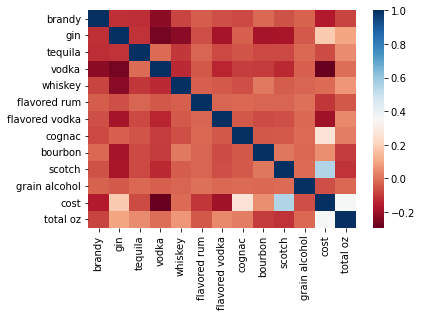

In [322]:
corr_heat = sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,cmap="RdBu")


In [323]:
df["cost"].corr(df["total oz"])
#justification for including total oz in regression

0.3533227866628533

In [324]:
def check_covar_costs():
    df_prices = pd.read_csv(INPUT_PATH, header=None)
    df_prices = df_prices.transpose()
    df_prices.columns = df_prices.loc[0]
    df_prices = df_prices.drop(0)
    df_prices = df_prices[["brandy","gin","tequila","vodka","whiskey","flavored rum","flavored vodka","cognac","bourbon","brandy","scotch","grain alcohol"]]
    return df_prices

In [325]:
check_covar_costs()

,brandy,gin,tequila,vodka,whiskey,flavored rum,flavored vodka,cognac,bourbon,brandy,scotch,grain alcohol
1,0.394,0.788,0.659687,0.391845,0.57,0.5,0.39668,2.263396,1.1,0.394,2.3,0.246667


In [326]:
def ols_regression():
    """Perform OLS regression of cost on types of alcohol"""

    df = model_data()
    x_cols = ["brandy","gin","tequila","vodka","whiskey","flavored rum","flavored vodka","cognac","bourbon","brandy","scotch","grain alcohol", "total oz"]
 
    x = df[x_cols]
    y = df["cost"]
    display(df[x_cols])


    model = sm.OLS(y, sm.add_constant(x)).fit()
    model_summary = model.summary()

    fig, ax = plt.subplots(figsize=(12, 7))

    ax.text(
        0.01, 0.05, str(model_summary), {"fontsize": 10}, fontproperties="monospace"
    )
    ax.axis("off")
    plt.tight_layout()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]


,brandy,gin,tequila,vodka,whiskey,flavored rum,flavored vodka,cognac,bourbon,brandy,scotch,grain alcohol,total oz
strdrink,,,,,,,,,,,,,
1-900-FUK-MEUP,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.50
252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.50
3 Wise Men,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.99
3-Mile Long Island Iced Tea,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.08
410 Gone,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
White Russian,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.00
Winter Paloma,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.19
Winter Rita,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.69


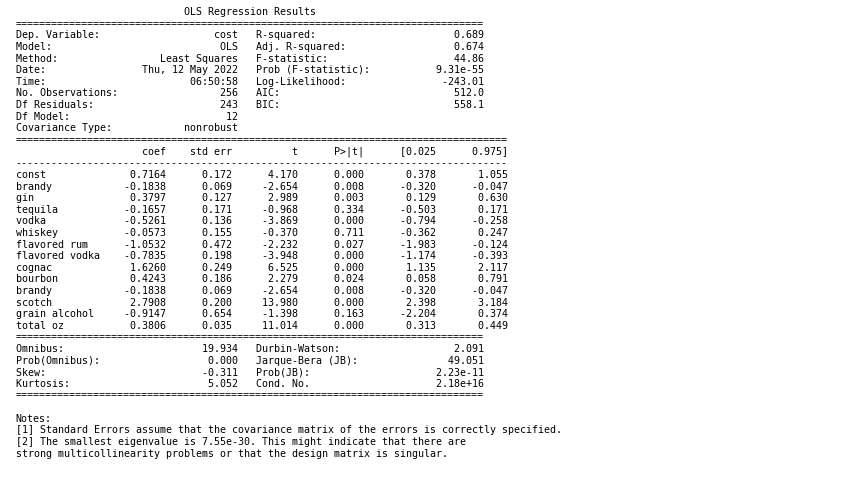

In [327]:
ols_regression()

In [328]:
 put abv
    multiply liquors and
    and then multiply across the entire table
find abv for different liquors 
take columns 
set ingredients to

SyntaxError: invalid syntax (3104828492.py, line 1)

In [376]:
INPUT_PATH = os.path.join("..//data", "ABV_list.csv")
OUTPUT_DIR = "ABV_data"
df_drinks = get_amount_table()
from prices_cleaning import load_ingredients
liquors = ["absinthe","advocaat","aperitif","aquavit","baileys","beer","bitters","bourbon","brandy", "cachaca","champagne", "cherry heering", "cognac", "drambuie","dry vermouth","dubonnet rouge", "erin cream", "everclear", "flavored rum","flavored vodka","frangelico","galliano", "gin", "grain alcohol","jagermeister", "liqueur", "pernod", "pisang ambon", "pisco","port","prosecco","red wine", "ricard","rum","sambuca","sarsaparilla","scotch","sherry","tequila", "vermouth","vodka", "whiskey","wine", "zima"]

In [377]:
get_amount_table()

ingredient,strdrink,absinthe,advocaat,aperitif,aquavit,baileys,beer,bitters,bourbon,brandy,butter,cachaca,carbonated water,champagne,cherry heering,club soda,coffee,cognac,cornstarch,drambuie,dry vermouth,dubonnet rouge,egg,erin cream,everclear,flavored rum,flavored vodka,food coloring,frangelico,fruit,fruit juice,galliano,gin,glycerine,grain alcohol,herb,hot sauce,ice,ice cream,jagermeister,liqueur,milk,mix,nut,olive brine,pernod,pisang ambon,pisco,port,prosecco,red wine,ricard,rum,sambuca,sarsaparilla,schnapps,scotch,sherry,soda,soy sauce,spice,sugar,sugard,sweet and sour,tequila,tonic water,vermouth,vodka,water,whiskey,wine,zima
0,1-900-FUK-MEUP,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,110 in the shade,0.0,0.0,0.00,0.0,0.00,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.5,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,151 Florida Bushwacker,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.00,11.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,155 Belmont,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.50,0.0,0.0,0.0,0.0
4,24k nightmare,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,Zizi Coin-coin,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.68,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.69,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
624,Zoksel,0.0,0.0,0.00,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
625,Zombie,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,4.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
626,Zorbatini,0.0,0.0,0.25,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.25,0.0,0.0,0.0,0.0


In [378]:
def load_ingredients():

    df = query_and_reshape_long()
    recoded = recode_long_data(df)
    summary = recoded[["ingredient", "amount"]].groupby("ingredient").agg(["mean", "sum"])
    return summary.index.values.tolist()



In [379]:
load_ingredients()

['absinthe',
 'advocaat',
 'aperitif',
 'aquavit',
 'baileys',
 'beer',
 'bitters',
 'bourbon',
 'brandy',
 'butter',
 'cachaca',
 'carbonated water',
 'champagne',
 'cherry heering',
 'club soda',
 'coffee',
 'cognac',
 'cornstarch',
 'drambuie',
 'dry vermouth',
 'dubonnet rouge',
 'egg',
 'erin cream',
 'everclear',
 'flavored rum',
 'flavored vodka',
 'food coloring',
 'frangelico',
 'fruit',
 'fruit juice',
 'galliano',
 'gin',
 'glycerine',
 'grain alcohol',
 'herb',
 'hot sauce',
 'ice',
 'ice cream',
 'jagermeister',
 'liqueur',
 'milk',
 'mix',
 'nut',
 'olive brine',
 'pernod',
 'pisang ambon',
 'pisco',
 'port',
 'prosecco',
 'red wine',
 'ricard',
 'rum',
 'sambuca',
 'sarsaparilla',
 'schnapps',
 'scotch',
 'sherry',
 'soda',
 'soy sauce',
 'spice',
 'sugar',
 'sugard',
 'sweet and sour',
 'tequila',
 'tonic water',
 'vermouth',
 'vodka',
 'water',
 'whiskey',
 'wine',
 'zima']

In [395]:
def non_alcoholic_ingredients():

    l1 = load_ingredients()
    df = pd.read_csv("https://github.com/ElliottMetzler/the-manhattan-project/blob/quant/data/ABV_list.csv", sep='\n')
    df[0].str.split(',', expand=True)

    display(df)
    l2 = df.columns.values.tolist()

    best_match_batch = set(l1).difference(set(l2))
    return list (best_match_batch)

In [396]:
non_alcoholic_ingredients()

KeyError: 0